Mounted at /content/drive
ADVERSARIAL ROBUSTNESS ANALYSIS

Device: cuda
GPU: Tesla T4
Mixed Precision: True
Output Directory: /content/drive/MyDrive/CombinedDataset/adversarial_results
LOADING DATASETS


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



 Test:  2425 samples (38 batches)
Train: 20960 samples (328 batches)
Val:   2430 samples (38 batches)

Loading model
Model loaded from: /content/drive/MyDrive/CombinedDataset/results_resnet18/best_resnet18.pth
PHASE 1: ORIGINAL MODEL EVALUATION

1. Clean Test Accuracy:


   Accuracy: 99.96%

2. FGSM Attack Results:


FGSM ε=0.001:   0%|          | 0/38 [00:00<?, ?it/s]/tmp/ipython-input-1520084765.py:172: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


   ε = 0.001: 94.23%


   ε = 0.005: 93.86%


   ε = 0.010: 93.77%


   ε = 0.020: 93.73%


   ε = 0.050: 94.02%

3. PGD Attack Result:


   Accuracy: 0.00%
   Attack Time: 75.4 seconds
ORIGINAL MODEL SUMMARY
Clean Accuracy:        99.96%
FGSM-0.01 Accuracy:    93.77%
PGD-0.01 Accuracy:     0.00%
Robustness Drop (PGD): 99.96%
PHASE 2: ADVERSARIAL TRAINING

Proceed with adversarial training? (y/n): y

Loading model


/tmp/ipython-input-1520084765.py:267: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler() if config.USE_AMP and torch.cuda.is_available() else None


Model loaded from: /content/drive/MyDrive/CombinedDataset/results_resnet18/best_resnet18.pth
ADVERSARIAL TRAINING (SUPER OPTIMIZED)
Optimizer: Adam (LR=0.0002)
Mixed Precision: Enabled
Training Epsilon: 0.01
Adversarial Ratio: 30%
Batch Size: 64
Epochs: 5
Epoch 1/5


Training:   0%|          | 0/328 [00:00<?, ?it/s]/tmp/ipython-input-1520084765.py:322: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():



Train Loss: 0.0709 | Train Acc: 0.9731
Val Acc:    0.9975
Epoch Time: 65.75 minutes
Best model saved (Val Acc: 0.9975)
Epoch 2/5



Train Loss: 0.0154 | Train Acc: 0.9943
Val Acc:    0.9988
Epoch Time: 1.92 minutes
Best model saved (Val Acc: 0.9988)
Epoch 3/5



Train Loss: 0.0111 | Train Acc: 0.9958
Val Acc:    0.9996
Epoch Time: 1.93 minutes
Best model saved (Val Acc: 0.9996)
Epoch 4/5



Train Loss: 0.0073 | Train Acc: 0.9977
Val Acc:    0.9996
Epoch Time: 1.92 minutes
Epoch 5/5



Train Loss: 0.0052 | Train Acc: 0.9982
Val Acc:    1.0000
Epoch Time: 1.89 minutes
Best model saved (Val Acc: 1.0000)
Training Complete!
Total Time: 73.42 minutes
Average Time per Epoch: 14.68 minutes
Best Val Accuracy: 1.0000
PHASE 3: ADVERSARIALLY TRAINED MODEL EVALUATION

1. Clean Test Accuracy:


   Accuracy: 99.92%
   Change: -0.04%

2. FGSM Attack Results:


   ε = 0.001: 99.88% (Δ +5.65%)


   ε = 0.005: 99.71% (Δ +5.86%)


   ε = 0.010: 99.59% (Δ +5.81%)


   ε = 0.020: 98.31% (Δ +4.58%)


   ε = 0.050: 97.53% (Δ +3.51%)

3. PGD Attack Result:


   Accuracy: 97.32% (Δ +97.32%)
GENERATING VISUALIZATIONS
Comparison plot saved


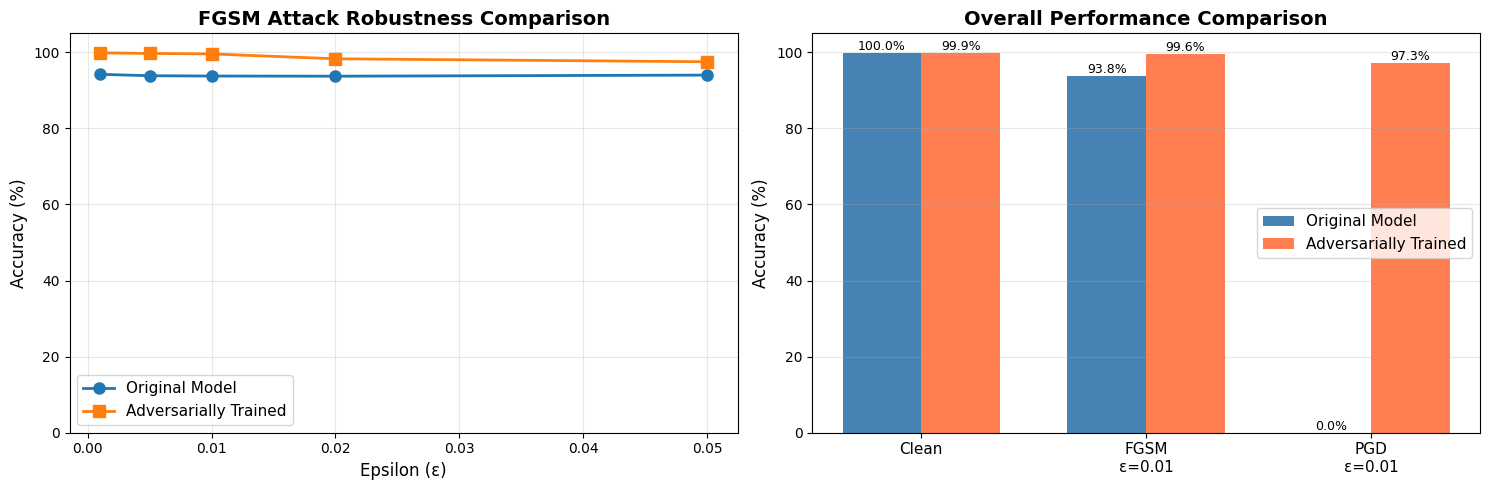

Training history plot saved


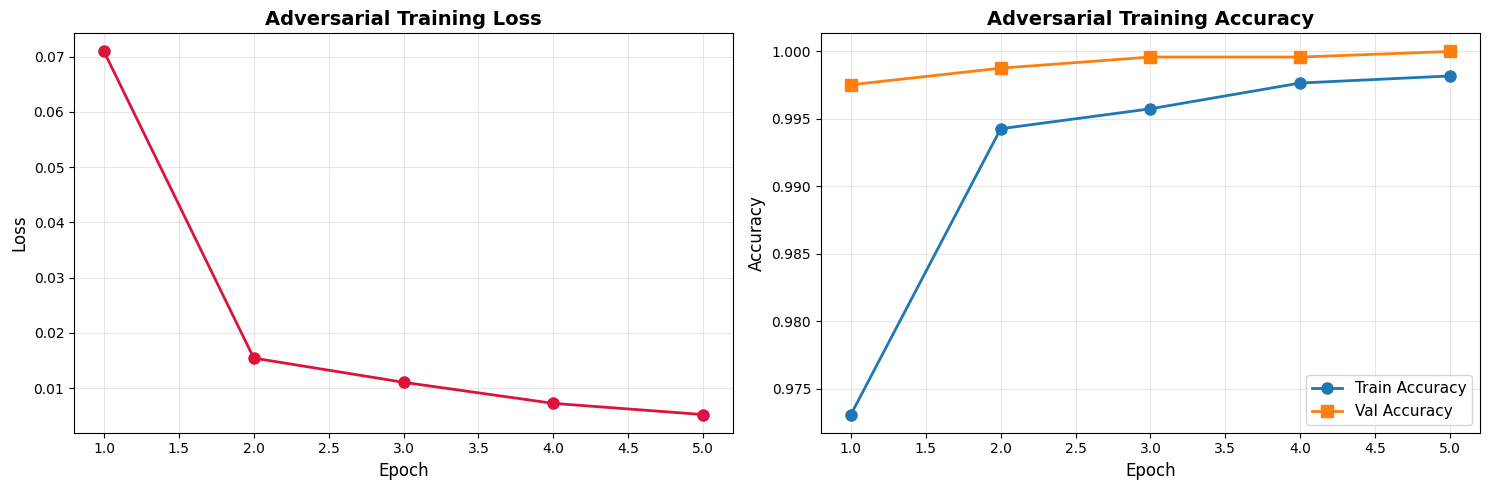

Confusion matrices saved


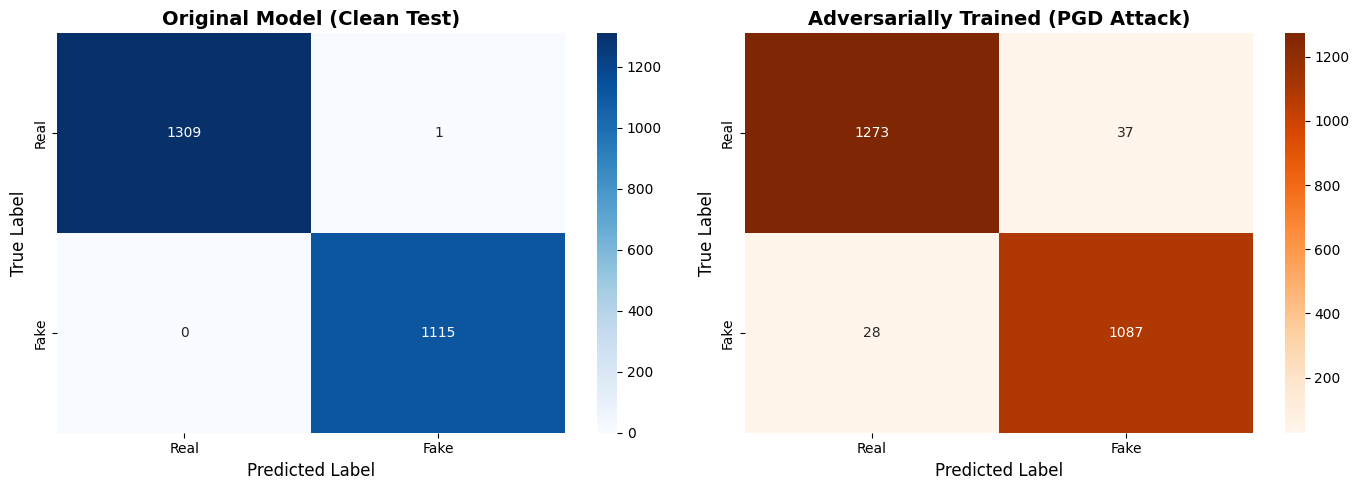

Results saved to adversarial_results.json

FINAL SUMMARY

ORIGINAL MODEL:
   Clean Accuracy:     99.96%
   FGSM-0.01 Accuracy: 93.77%
   PGD-0.01 Accuracy:  0.00%
   Robustness Drop:    99.96%

ADVERSARIALLY TRAINED MODEL:
   Clean Accuracy:     99.92% (-0.04%)
   FGSM-0.01 Accuracy: 99.59% (+5.81%)
   PGD-0.01 Accuracy:  97.32% (+97.32%)
   Robustness Drop:    2.60%

IMPROVEMENTS:
   PGD Robustness Gain:      +97.32 percentage points
   FGSM-0.01 Robustness Gain: +5.81 percentage points
   Clean Accuracy Trade-off:  -0.04 percentage points
   Trade-off Ratio:          2360.00x (robustness gain per accuracy loss)

TRAINING EFFICIENCY:
   Total Training Time:  73.42 minutes
   Average per Epoch:    14.68 minutes
   Samples per Second:   23.8

 All results saved to: /content/drive/MyDrive/CombinedDataset/adversarial_results
   - adversarial_trained_model.pth
   - adversarial_results.json
   - adversarial_comparison.png
   - adversarial_training_history.png
   - confusion_matrices.png
ANA

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import models
from sklearn.metrics import classification_report, confusion_matrix
import time


#congfig


class Config:
    # Paths
    DATA_ROOT = "/content/drive/MyDrive/CombinedDataset"
    MODEL_PATH = "/content/drive/MyDrive/CombinedDataset/results_resnet18/best_resnet18.pth"
    OUT_DIR = "/content/drive/MyDrive/CombinedDataset/adversarial_results"

    # Model settings
    IMG_SIZE = 224
    BATCH_SIZE = 64  # INCREASED from 32 - processes more data per iteration #32->64->128
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Adversarial attack settings
    EPSILON_VALUES = [0.001, 0.005, 0.01, 0.02, 0.05]
    PGD_EPSILON = 0.01
    PGD_ALPHA = 0.002
    PGD_ITERATIONS = 10

    # Adversarial training settings (SUPER OPTIMIZED)
    ADV_TRAIN_EPOCHS = 5 #10->5
    ADV_TRAIN_LR = 2e-4  # Slightly higher LR for faster convergence
    ADV_TRAIN_EPSILON = 0.01
    WEIGHT_DECAY = 1e-4

    # Optimization settings
    USE_AMP = True  # Automatic Mixed Precision
    NUM_WORKERS = 4  # INCREASED from 2 - more parallel data loading
    PREFETCH_FACTOR = 2  # Prefetch batches
    PERSISTENT_WORKERS = True  # Keep workers alive between epochs

    # Training optimizations
    ADV_RATIO = 0.3  # REDUCED from 0.5 - only 30% adversarial examples (faster)
    GRADIENT_ACCUMULATION = 1  # Number of steps to accumulate gradients

    # Reproducibility
    SEED = 42

config = Config()
os.makedirs(config.OUT_DIR, exist_ok=True)

# Set random seeds
np.random.seed(config.SEED)
torch.manual_seed(config.SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(config.SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


print("ADVERSARIAL ROBUSTNESS ANALYSIS")

print(f"\nDevice: {config.DEVICE}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
print(f"Mixed Precision: {config.USE_AMP}")
print(f"Output Directory: {config.OUT_DIR}")


#dataset class


class MelSpectrogramDataset(Dataset):
    """Dataset for loading mel spectrogram .npy files"""

    def __init__(self, root_dir, img_size=224, augment=False):
        self.root_dir = os.path.join(root_dir, "mel")
        self.img_size = img_size
        self.augment = augment
        self.files = []
        self.labels = []

        # Load file paths
        for label_name, label_id in [('real', 0), ('fake', 1)]:
            folder = os.path.join(self.root_dir, label_name)
            if not os.path.exists(folder):
                raise ValueError(f"Folder not found: {folder}")

            for filename in os.listdir(folder):
                if filename.lower().endswith('.npy'):
                    self.files.append(os.path.join(folder, filename))
                    self.labels.append(label_id)

        if len(self.files) == 0:
            raise ValueError(f"No .npy files found in {self.root_dir}")

        # Shuffle dataset
        combined = list(zip(self.files, self.labels))
        np.random.shuffle(combined)
        self.files, self.labels = zip(*combined)

        # Transforms
        self.to_pil = transforms.ToPILImage()
        self.resize = transforms.Resize((img_size, img_size))
        self.to_tensor = transforms.ToTensor()
        self.normalize = transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        # Load mel spectrogram
        mel_spec = np.load(self.files[idx])

        # Convert to 3-channel
        if mel_spec.ndim == 2:
            mel_spec = np.stack([mel_spec] * 3, axis=-1)

        # Normalize to [0, 255]
        mel_min, mel_max = mel_spec.min(), mel_spec.max()
        mel_normalized = ((mel_spec - mel_min) / (mel_max - mel_min + 1e-9) * 255).astype(np.uint8)

        # Convert to PIL and apply transforms
        image = self.to_pil(mel_normalized)
        image = self.resize(image)
        image = self.to_tensor(image)
        image = self.normalize(image)

        return image, self.labels[idx]


#loading model from drive


def load_model(model_path, device):
    """Load pretrained ResNet-18 model"""
    print("\nLoading model")
    model = models.resnet18(weights=None)
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, 2)

    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()

    print(f"Model loaded from: {model_path}")
    return model

#ADVERSARIAL ATTACKS (OPTIMIZED)


def fgsm_attack(model, images, labels, epsilon):
    """Fast Gradient Sign Method attack - OPTIMIZED"""
    images.requires_grad = True

    # Use mixed precision for attack generation too
    if config.USE_AMP and torch.cuda.is_available():
        with torch.cuda.amp.autocast():
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
    else:
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)

    model.zero_grad()
    loss.backward()

    data_grad = images.grad.data
    sign_data_grad = data_grad.sign()
    perturbed_images = images + epsilon * sign_data_grad
    perturbed_images = torch.clamp(perturbed_images, images.min(), images.max())

    return perturbed_images.detach()

def pgd_attack(model, images, labels, epsilon, alpha, num_iterations):
    """Projected Gradient Descent attack"""
    original_images = images.clone().detach()
    perturbed_images = images.clone().detach()

    for i in range(num_iterations):
        perturbed_images.requires_grad = True

        outputs = model(perturbed_images)
        loss = F.cross_entropy(outputs, labels)

        model.zero_grad()
        loss.backward()

        data_grad = perturbed_images.grad.data
        perturbed_images = perturbed_images.detach() + alpha * data_grad.sign()

        # Project back to epsilon ball
        perturbation = torch.clamp(perturbed_images - original_images, -epsilon, epsilon)
        perturbed_images = torch.clamp(original_images + perturbation,
                                       original_images.min(), original_images.max()).detach()

    return perturbed_images


#evaluation function


def evaluate_model(model, dataloader, device, attack_fn=None, attack_params=None, desc="Evaluating"):
    """Evaluate model on clean or adversarial examples"""
    model.eval()
    all_preds = []
    all_labels = []

    context = torch.no_grad() if attack_fn is None else torch.enable_grad()

    with context:
        for images, labels in tqdm(dataloader, desc=desc, leave=False):
            images = images.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            #generate adversarial examples if needed
            if attack_fn is not None:
                images = attack_fn(model, images, labels, **attack_params)

            #get predictions
            with torch.no_grad():
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    accuracy = (all_preds == all_labels).mean()

    return accuracy, all_preds, all_labels


#ADVERSARIAL TRAINING (OPTIMIZED)


def adversarial_training(model, train_loader, val_loader, config):
    """Train model with adversarial examples - SUPER OPTIMIZED"""

    print("ADVERSARIAL TRAINING (SUPER OPTIMIZED)")


    model.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=config.ADV_TRAIN_LR,
        weight_decay=config.WEIGHT_DECAY
    )

    # Mixed precision scaler
    scaler = torch.cuda.amp.GradScaler() if config.USE_AMP and torch.cuda.is_available() else None
    use_amp = config.USE_AMP and torch.cuda.is_available()

    print(f"Optimizer: Adam (LR={config.ADV_TRAIN_LR})")
    print(f"Mixed Precision: {'Enabled' if use_amp else 'Disabled'}")
    print(f"Training Epsilon: {config.ADV_TRAIN_EPSILON}")
    print(f"Adversarial Ratio: {config.ADV_RATIO*100:.0f}%")
    print(f"Batch Size: {config.BATCH_SIZE}")
    print(f"Epochs: {config.ADV_TRAIN_EPOCHS}")

    best_val_acc = 0.0
    history = {'train_loss': [], 'train_acc': [], 'val_acc': [], 'epoch_time': []}

    for epoch in range(config.ADV_TRAIN_EPOCHS):
        epoch_start_time = time.time()

        print(f"Epoch {epoch+1}/{config.ADV_TRAIN_EPOCHS}")


        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in tqdm(train_loader, desc="Training", leave=False):
            images = images.to(config.DEVICE, non_blocking=True)
            labels = labels.to(config.DEVICE, non_blocking=True)

            # Split batch: ADV_RATIO adversarial, rest clean
            batch_size = images.size(0)
            adv_size = int(batch_size * config.ADV_RATIO)

            clean_images = images[adv_size:]
            clean_labels = labels[adv_size:]

            adv_images_raw = images[:adv_size]
            adv_labels = labels[:adv_size]

            # Generate adversarial examples (with mixed precision)
            if adv_size > 0:
                with torch.enable_grad():
                    adv_images = fgsm_attack(model, adv_images_raw, adv_labels, config.ADV_TRAIN_EPSILON)

                # Combine clean and adversarial
                combined_images = torch.cat([clean_images, adv_images], dim=0)
                combined_labels = torch.cat([clean_labels, adv_labels], dim=0)
            else:
                combined_images = clean_images
                combined_labels = clean_labels

            # Forward pass with mixed precision
            optimizer.zero_grad(set_to_none=True)

            if use_amp:
                with torch.cuda.amp.autocast():
                    outputs = model(combined_images)
                    loss = criterion(outputs, combined_labels)

                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            else:
                outputs = model(combined_images)
                loss = criterion(outputs, combined_labels)
                loss.backward()
                optimizer.step()

            # Statistics
            running_loss += loss.item() * combined_images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += combined_labels.size(0)
            correct += (predicted == combined_labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total

        # Validation phase
        val_acc, _, _ = evaluate_model(model, val_loader, config.DEVICE, desc="Validation")

        epoch_time = time.time() - epoch_start_time

        # Save history
        history['train_loss'].append(epoch_loss)
        history['train_acc'].append(epoch_acc)
        history['val_acc'].append(val_acc)
        history['epoch_time'].append(epoch_time)

        # Print results
        print(f"\nTrain Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f}")
        print(f"Val Acc:    {val_acc:.4f}")
        print(f"Epoch Time: {epoch_time/60:.2f} minutes")

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(),
                      os.path.join(config.OUT_DIR, "adversarial_trained_model.pth"))
            print(f"Best model saved (Val Acc: {val_acc:.4f})")

    total_time = sum(history['epoch_time'])

    print(f"Training Complete!")
    print(f"Total Time: {total_time/60:.2f} minutes")
    print(f"Average Time per Epoch: {total_time/config.ADV_TRAIN_EPOCHS/60:.2f} minutes")
    print(f"Best Val Accuracy: {best_val_acc:.4f}")


    return model, history


#main exectuion

print("LOADING DATASETS")


# Load datasets
test_dataset = MelSpectrogramDataset(
    os.path.join(config.DATA_ROOT, "test"),
    img_size=config.IMG_SIZE
)

train_dataset = MelSpectrogramDataset(
    os.path.join(config.DATA_ROOT, "train"),
    img_size=config.IMG_SIZE
)

val_dataset = MelSpectrogramDataset(
    os.path.join(config.DATA_ROOT, "val"),
    img_size=config.IMG_SIZE
)

# Create dataloaders with SUPER optimizations
test_loader = DataLoader(
    test_dataset,
    batch_size=config.BATCH_SIZE,
    shuffle=False,
    num_workers=config.NUM_WORKERS,
    pin_memory=True,
    prefetch_factor=config.PREFETCH_FACTOR,
    persistent_workers=config.PERSISTENT_WORKERS
)

train_loader = DataLoader(
    train_dataset,
    batch_size=config.BATCH_SIZE,
    shuffle=True,
    num_workers=config.NUM_WORKERS,
    pin_memory=True,
    prefetch_factor=config.PREFETCH_FACTOR,
    persistent_workers=config.PERSISTENT_WORKERS
)

val_loader = DataLoader(
    val_dataset,
    batch_size=config.BATCH_SIZE,
    shuffle=False,
    num_workers=config.NUM_WORKERS,
    pin_memory=True,
    prefetch_factor=config.PREFETCH_FACTOR,
    persistent_workers=config.PERSISTENT_WORKERS
)

print(f"\n Test:  {len(test_dataset)} samples ({len(test_loader)} batches)")
print(f"Train: {len(train_dataset)} samples ({len(train_loader)} batches)")
print(f"Val:   {len(val_dataset)} samples ({len(val_loader)} batches)")

# Load original model
original_model = load_model(config.MODEL_PATH, config.DEVICE)

#PHASE 1: TEST ORIGINAL MODEL



print("PHASE 1: ORIGINAL MODEL EVALUATION")

print("\n1. Clean Test Accuracy:")
clean_acc, clean_preds, clean_labels = evaluate_model(
    original_model, test_loader, config.DEVICE, desc="Clean Test"
)
print(f"   Accuracy: {clean_acc*100:.2f}%")

print("\n2. FGSM Attack Results:")
fgsm_results = {}
for epsilon in config.EPSILON_VALUES:
    acc, _, _ = evaluate_model(
        original_model, test_loader, config.DEVICE,
        attack_fn=fgsm_attack,
        attack_params={'epsilon': epsilon},
        desc=f"FGSM ε={epsilon}"
    )
    fgsm_results[epsilon] = acc
    print(f"   ε = {epsilon:.3f}: {acc*100:.2f}%")

print("\n3. PGD Attack Result:")
pgd_start = time.time()
pgd_acc, pgd_preds, pgd_labels = evaluate_model(
    original_model, test_loader, config.DEVICE,
    attack_fn=pgd_attack,
    attack_params={
        'epsilon': config.PGD_EPSILON,
        'alpha': config.PGD_ALPHA,
        'num_iterations': config.PGD_ITERATIONS
    },
    desc="PGD Attack"
)
pgd_time = time.time() - pgd_start
print(f"   Accuracy: {pgd_acc*100:.2f}%")
print(f"   Attack Time: {pgd_time:.1f} seconds")

# Print summary

print("ORIGINAL MODEL SUMMARY")

print(f"Clean Accuracy:        {clean_acc*100:.2f}%")
print(f"FGSM-0.01 Accuracy:    {fgsm_results[0.01]*100:.2f}%")
print(f"PGD-0.01 Accuracy:     {pgd_acc*100:.2f}%")
print(f"Robustness Drop (PGD): {(clean_acc - pgd_acc)*100:.2f}%")


#PHASE 2: ADVERSARIAL TRAINING



print("PHASE 2: ADVERSARIAL TRAINING")


response = input("\nProceed with adversarial training? (y/n): ")

if response.lower() == 'y':
    # Load fresh model for adversarial training
    adv_model = load_model(config.MODEL_PATH, config.DEVICE)

    # Train with adversarial examples
    adv_model, adv_history = adversarial_training(adv_model, train_loader, val_loader, config)


    #PHASE 3: TEST ADVERSARIALLY TRAINED MODEL



    print("PHASE 3: ADVERSARIALLY TRAINED MODEL EVALUATION")


    print("\n1. Clean Test Accuracy:")
    adv_clean_acc, _, _ = evaluate_model(
        adv_model, test_loader, config.DEVICE, desc="Clean Test"
    )
    print(f"   Accuracy: {adv_clean_acc*100:.2f}%")
    print(f"   Change: {(adv_clean_acc - clean_acc)*100:+.2f}%")

    print("\n2. FGSM Attack Results:")
    adv_fgsm_results = {}
    for epsilon in config.EPSILON_VALUES:
        acc, _, _ = evaluate_model(
            adv_model, test_loader, config.DEVICE,
            attack_fn=fgsm_attack,
            attack_params={'epsilon': epsilon},
            desc=f"FGSM ε={epsilon}"
        )
        adv_fgsm_results[epsilon] = acc
        improvement = (acc - fgsm_results[epsilon]) * 100
        print(f"   ε = {epsilon:.3f}: {acc*100:.2f}% (Δ {improvement:+.2f}%)")

    print("\n3. PGD Attack Result:")
    adv_pgd_acc, _, _ = evaluate_model(
        adv_model, test_loader, config.DEVICE,
        attack_fn=pgd_attack,
        attack_params={
            'epsilon': config.PGD_EPSILON,
            'alpha': config.PGD_ALPHA,
            'num_iterations': config.PGD_ITERATIONS
        },
        desc="PGD Attack"
    )
    pgd_improvement = (adv_pgd_acc - pgd_acc) * 100
    print(f"   Accuracy: {adv_pgd_acc*100:.2f}% (Δ {pgd_improvement:+.2f}%)")


    #plots, visualizations



    print("GENERATING VISUALIZATIONS")


    # Plot 1: Robustness Comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # FGSM comparison
    epsilons = list(fgsm_results.keys())
    original_fgsm = [fgsm_results[e]*100 for e in epsilons]
    adversarial_fgsm = [adv_fgsm_results[e]*100 for e in epsilons]

    ax1.plot(epsilons, original_fgsm, 'o-', label='Original Model', linewidth=2, markersize=8)
    ax1.plot(epsilons, adversarial_fgsm, 's-', label='Adversarially Trained', linewidth=2, markersize=8)
    ax1.set_xlabel('Epsilon (ε)', fontsize=12)
    ax1.set_ylabel('Accuracy (%)', fontsize=12)
    ax1.set_title('FGSM Attack Robustness Comparison', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11)
    ax1.grid(alpha=0.3)
    ax1.set_ylim([0, 105])

    # Overall comparison
    categories = ['Clean', 'FGSM\nε=0.01', 'PGD\nε=0.01']
    original_scores = [clean_acc*100, fgsm_results[0.01]*100, pgd_acc*100]
    adversarial_scores = [adv_clean_acc*100, adv_fgsm_results[0.01]*100, adv_pgd_acc*100]

    x = np.arange(len(categories))
    width = 0.35

    bars1 = ax2.bar(x - width/2, original_scores, width, label='Original Model', color='steelblue')
    bars2 = ax2.bar(x + width/2, adversarial_scores, width, label='Adversarially Trained', color='coral')

    ax2.set_ylabel('Accuracy (%)', fontsize=12)
    ax2.set_title('Overall Performance Comparison', fontsize=14, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(categories, fontsize=11)
    ax2.legend(fontsize=11)
    ax2.grid(alpha=0.3, axis='y')
    ax2.set_ylim([0, 105])

    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.savefig(os.path.join(config.OUT_DIR, 'adversarial_comparison.png'),
                dpi=300, bbox_inches='tight')
    print("Comparison plot saved")
    plt.show()

    # Plot 2: Training History
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    epochs = range(1, len(adv_history['train_loss']) + 1)

    ax1.plot(epochs, adv_history['train_loss'], 'o-', linewidth=2, markersize=8, color='crimson')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.set_title('Adversarial Training Loss', fontsize=14, fontweight='bold')
    ax1.grid(alpha=0.3)

    ax2.plot(epochs, adv_history['train_acc'], 'o-', label='Train Accuracy', linewidth=2, markersize=8)
    ax2.plot(epochs, adv_history['val_acc'], 's-', label='Val Accuracy', linewidth=2, markersize=8)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.set_title('Adversarial Training Accuracy', fontsize=14, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig(os.path.join(config.OUT_DIR, 'adversarial_training_history.png'),
                dpi=300, bbox_inches='tight')
    print("Training history plot saved")
    plt.show()

    # Plot 3: Confusion Matrices
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Original model confusion matrix
    cm_original = confusion_matrix(clean_labels, clean_preds)
    sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    ax1.set_title('Original Model (Clean Test)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('True Label', fontsize=12)
    ax1.set_xlabel('Predicted Label', fontsize=12)

    # Adversarial model under PGD attack
    adv_pgd_preds = evaluate_model(
        adv_model, test_loader, config.DEVICE,
        attack_fn=pgd_attack,
        attack_params={'epsilon': config.PGD_EPSILON, 'alpha': config.PGD_ALPHA,
                      'num_iterations': config.PGD_ITERATIONS}
    )[1]
    cm_adv = confusion_matrix(pgd_labels, adv_pgd_preds)
    sns.heatmap(cm_adv, annot=True, fmt='d', cmap='Oranges', ax=ax2,
                xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    ax2.set_title('Adversarially Trained (PGD Attack)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('True Label', fontsize=12)
    ax2.set_xlabel('Predicted Label', fontsize=12)

    plt.tight_layout()
    plt.savefig(os.path.join(config.OUT_DIR, 'confusion_matrices.png'),
                dpi=300, bbox_inches='tight')
    print("Confusion matrices saved")
    plt.show()

    # Save results to JSON
    results = {
        'original_model': {
            'clean_accuracy': float(clean_acc),
            'fgsm_results': {str(k): float(v) for k, v in fgsm_results.items()},
            'pgd_accuracy': float(pgd_acc)
        },
        'adversarial_model': {
            'clean_accuracy': float(adv_clean_acc),
            'fgsm_results': {str(k): float(v) for k, v in adv_fgsm_results.items()},
            'pgd_accuracy': float(adv_pgd_acc)
        },
        'improvements': {
            'clean_accuracy_change': float(adv_clean_acc - clean_acc),
            'fgsm_0.01_improvement': float(adv_fgsm_results[0.01] - fgsm_results[0.01]),
            'pgd_improvement': float(adv_pgd_acc - pgd_acc)
        },
        'training_history': {
            'train_loss': [float(x) for x in adv_history['train_loss']],
            'train_acc': [float(x) for x in adv_history['train_acc']],
            'val_acc': [float(x) for x in adv_history['val_acc']],
            'epoch_times': [float(x) for x in adv_history['epoch_time']]
        }
    }

    with open(os.path.join(config.OUT_DIR, 'adversarial_results.json'), 'w') as f:
        json.dump(results, f, indent=2)
    print("Results saved to adversarial_results.json")


    #sumamry


    print("\n" + "="*60)
    print("FINAL SUMMARY")
    print("="*60)

    print("\nORIGINAL MODEL:")
    print(f"   Clean Accuracy:     {clean_acc*100:.2f}%")
    print(f"   FGSM-0.01 Accuracy: {fgsm_results[0.01]*100:.2f}%")
    print(f"   PGD-0.01 Accuracy:  {pgd_acc*100:.2f}%")
    print(f"   Robustness Drop:    {(clean_acc - pgd_acc)*100:.2f}%")

    print("\nADVERSARIALLY TRAINED MODEL:")
    print(f"   Clean Accuracy:     {adv_clean_acc*100:.2f}% ({(adv_clean_acc-clean_acc)*100:+.2f}%)")
    print(f"   FGSM-0.01 Accuracy: {adv_fgsm_results[0.01]*100:.2f}% ({(adv_fgsm_results[0.01]-fgsm_results[0.01])*100:+.2f}%)")
    print(f"   PGD-0.01 Accuracy:  {adv_pgd_acc*100:.2f}% ({(adv_pgd_acc-pgd_acc)*100:+.2f}%)")
    print(f"   Robustness Drop:    {(adv_clean_acc - adv_pgd_acc)*100:.2f}%")

    print("\nIMPROVEMENTS:")
    print(f"   PGD Robustness Gain:      {(adv_pgd_acc - pgd_acc)*100:+.2f} percentage points")
    print(f"   FGSM-0.01 Robustness Gain: {(adv_fgsm_results[0.01] - fgsm_results[0.01])*100:+.2f} percentage points")
    print(f"   Clean Accuracy Trade-off:  {(adv_clean_acc - clean_acc)*100:+.2f} percentage points")

    # Calculate trade-off ratio
    robustness_gain = (adv_pgd_acc - pgd_acc) * 100
    clean_loss = abs((adv_clean_acc - clean_acc) * 100)
    if clean_loss > 0:
        trade_off_ratio = robustness_gain / clean_loss
        print(f"   Trade-off Ratio:          {trade_off_ratio:.2f}x (robustness gain per accuracy loss)")

    print("\nTRAINING EFFICIENCY:")
    avg_epoch_time = sum(adv_history['epoch_time']) / len(adv_history['epoch_time'])
    total_training_time = sum(adv_history['epoch_time'])
    print(f"   Total Training Time:  {total_training_time/60:.2f} minutes")
    print(f"   Average per Epoch:    {avg_epoch_time/60:.2f} minutes")
    print(f"   Samples per Second:   {len(train_loader.dataset) / avg_epoch_time:.1f}")

    print(f"\n All results saved to: {config.OUT_DIR}")
    print("   - adversarial_trained_model.pth")
    print("   - adversarial_results.json")
    print("   - adversarial_comparison.png")
    print("   - adversarial_training_history.png")
    print("   - confusion_matrices.png")


    print("ANALYSIS COMPLETE")


    # Generate classification reports
    print("\nDETAILED CLASSIFICATION REPORTS:")
    print("\nOriginal Model (Clean Test)")
    print(classification_report(clean_labels, clean_preds,
                                target_names=['Real', 'Fake'],
                                digits=4))

    print("\nOriginal Model (PGD Attack)")
    print(classification_report(pgd_labels, pgd_preds,
                                target_names=['Real', 'Fake'],
                                digits=4))

    print("\nAdversarially Trained Model (PGD Attack)")
    print(classification_report(pgd_labels, adv_pgd_preds,
                                target_names=['Real', 'Fake'],
                                digits=4))

else:
    print("\nAdversarial training skipped.")
    print("\n can still use the Phase 1 results to analyze the original model's vulnerabilities.")

    # Save Phase 1 results only
    phase1_results = {
        'original_model': {
            'clean_accuracy': float(clean_acc),
            'fgsm_results': {str(k): float(v) for k, v in fgsm_results.items()},
            'pgd_accuracy': float(pgd_acc),
            'robustness_drop': float(clean_acc - pgd_acc)
        }
    }

    with open(os.path.join(config.OUT_DIR, 'phase1_results.json'), 'w') as f:
        json.dump(phase1_results, f, indent=2)

    print(f"\nPhase 1 results saved to: {config.OUT_DIR}/phase1_results.json")

    # Generate simple visualization for Phase 1
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    epsilons = list(fgsm_results.keys())
    accuracies = [fgsm_results[e]*100 for e in epsilons]

    ax.plot(epsilons, accuracies, 'o-', linewidth=2, markersize=10, color='steelblue')
    ax.axhline(y=clean_acc*100, color='green', linestyle='--', linewidth=2, label='Clean Accuracy')
    ax.axhline(y=pgd_acc*100, color='red', linestyle='--', linewidth=2, label='PGD Accuracy')

    ax.set_xlabel('FGSM Epsilon (ε)', fontsize=12)
    ax.set_ylabel('Accuracy (%)', fontsize=12)
    ax.set_title('Original Model: Adversarial Robustness Analysis', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11)
    ax.grid(alpha=0.3)
    ax.set_ylim([0, 105])

    # Annotate points
    for i, (eps, acc) in enumerate(zip(epsilons, accuracies)):
        ax.annotate(f'{acc:.1f}%',
                   xy=(eps, acc),
                   xytext=(0, 10),
                   textcoords='offset points',
                   ha='center',
                   fontsize=9)

    plt.tight_layout()
    plt.savefig(os.path.join(config.OUT_DIR, 'phase1_robustness_curve.png'),
                dpi=300, bbox_inches='tight')
    print("Robustness curve saved")
    plt.show()

    print("PHASE 1 ANALYSIS COMPLETE")


